##   TensorFlow essentials

In [5]:
## Inner product of 2 vectors without any library

In [6]:
prices= [1,2]

In [7]:
amounts=[10.0,20.0]

In [8]:
revenue=0
for price, amount in zip(prices,amounts):
    revenue+=price*amount

In [9]:
revenue

50.0

In [ ]:
## Inner product of 2 vectors with numpy

In [10]:
import numpy as np

In [12]:
revenue= np.dot(prices,amounts)
revenue

50.0

In [13]:
import tensorflow as tf

##  Concept 1- Defining and Representing tensors

#### A tensor is generalization of a matrix that specifies an element by an arbitary number of indices

In [17]:
my_tensor=[[[1,2],[3,4],[5,6],[7,8],[9,10],[11,23]]]
my_tensor
# This tensor can be thought as multiple matrices stacked on top of each other. To specify an element, you need to indicate the 
#row and column as well as which matrix is being accessed. So this has a rank of 3

[[[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 23]]]

### Different ways of representing tensors

1. create a list and use tf.convert_to_tensor
2. create an array and use the above
3. use constant operator

In [19]:
import numpy as np

In [21]:
m1= [[1.0,2.0],[3.0,4.0]]
m1

[[1.0, 2.0], [3.0, 4.0]]

In [26]:
type(m1)

list

In [23]:
m2=np.array([[1.0,2.0],[3.0,4.0]],dtype=np.float32)
m2

array([[ 1.,  2.],
       [ 3.,  4.]], dtype=float32)

In [27]:
type(m2)

numpy.ndarray

In [25]:
m3= tf.constant([[1.0,2.0],[3.0,4.0]])
m3


<tf.Tensor 'Const_1:0' shape=(2, 2) dtype=float32>

In [28]:
type(m3)

tensorflow.python.framework.ops.Tensor

In [ ]:
##convert m1, m2, m3 into tensors

In [29]:
t1=tf.convert_to_tensor(m1,dtype= np.float32)

In [30]:
type(t1)

tensorflow.python.framework.ops.Tensor

In [31]:
t2=tf.convert_to_tensor(m2,dtype= np.float32)

In [32]:
type(t2)

tensorflow.python.framework.ops.Tensor

In [33]:
t3=tf.convert_to_tensor(m3,dtype= np.float32)

In [34]:
type(t3)

tensorflow.python.framework.ops.Tensor

In [37]:
m4= tf.constant([[1.0,2.0,3.0],[4.0,5.0,6.0]])

In [38]:
type(m4)

tensorflow.python.framework.ops.Tensor

In [39]:
m4

<tf.Tensor 'Const_5:0' shape=(2, 3) dtype=float32>

In [45]:
m5= tf.constant([[[1.0,2.0,3.0],[4.0,5.0,6.0]],[[7,8,9],[10,11,12]]])

In [46]:
m5

<tf.Tensor 'Const_7:0' shape=(2, 2, 3) dtype=float32>

#### Create useful tensors on the fly

#####  zeroes

In [47]:
tf.zeros((2,3))

<tf.Tensor 'zeros:0' shape=(2, 3) dtype=float32>

#### ones

In [48]:
tf.ones((3,4))

<tf.Tensor 'ones:0' shape=(3, 4) dtype=float32>

In [ ]:
### create a 500 by 500 tensor with all elements =0.5

In [50]:
tf.ones([500,500])*0.5

<tf.Tensor 'mul_1:0' shape=(500, 500) dtype=float32>

##  Concept 2- Creating operators in tensor

In [51]:
x=tf.ones((3,4))

In [52]:
neg_x= tf.negative(x)

In [53]:
neg_x

<tf.Tensor 'Neg:0' shape=(3, 4) dtype=float32>

#### Other useful operations are

1. tf.add(x,y)
2. tf.multiply(x,y)
3. tf.pow(x,y)
4. tf.exp(x)
5. tf.sqrt(x)


In [54]:
### Use tensorflow operations and produce Gaussian distribution (normal distribution)
 #P(x)= 1/(sigmasqrt(2pi))e^(-(x-mu)^2/(2sigma^2)) 

In [55]:

from math import pi


In [57]:
mean=0.0
sigma=1.0

tf.exp(tf.negative(tf.pow(x-mean,2)/(2*tf.pow(sigma,2))))*(1/sigma*tf.sqrt(2.0*pi))

<tf.Tensor 'mul_7:0' shape=(3, 4) dtype=float32>

##  Concept 3- Executing operators with sessions

To execute an operation and retreive its calculated value, TF requires a session. Only a registered session may fill in values for a tensor object. To do this, use tf.Session().



In [58]:
## Using a Session

In [59]:
import tensorflow as tf

In [60]:
x= tf.constant([[1,2],[3,4]])

In [61]:
neg_x= tf.negative(x)

In [62]:
with tf.Session() as sess:
    result= sess.run(neg_x)

In [63]:
result

array([[-1, -2],
       [-3, -4]], dtype=int32)

Every tensor object has an eval method. However eval requires defining a session object for the library to understand how to best make use of hardware

While running TF through an interactive environment, it's easier to create a session in interactive mode

In [65]:
import tensorflow as tf

In [67]:
sess= tf.InteractiveSession()

In [68]:
x= tf.constant([[1,2],[3,4]])

In [69]:
neg_x= tf.negative(x)

In [70]:
result= neg_x.eval()
result

array([[-1, -2],
       [-3, -4]], dtype=int32)

## Concept 4- Understanding code as a graph

Each arrow in the graph is a called the edge of the graph, every state of the graph is a node

## Concept 5- Session configuration

In [73]:
with tf.Session(config= tf.ConfigProto(log_device_placement=True)) as sess:
    result= sess.run(neg_x)
print(result)

[[-1 -2]
 [-3 -4]]


In [74]:
## This outputs info about which CPU/GPU devices are used in the session for each operation. 

IMPORTANCE OF SESSIONS

1. Run the math
2. run graph operations, takes placeholders, variables and constants as inputs

Placeholder- A value that is unassigned but initialized by the session where ever it is run
Variable- A value that can change such as parameters of a machine learning model
Constant- A value that does not change, such as hyper parameters or setting

## Concept 6- Using Variables

In [98]:
import tensorflow as tf
sess= tf.InteractiveSession()

In [99]:
data= [1.,2.,8.,-1.,0.,5.5,6.,15]

In [100]:
spike= tf.Variable(False)

In [101]:
spike.initializer.run()

In [102]:
saver= tf.train.Saver()

In [104]:
for i in range(1,len(data)):
    if data[i]-data[i-1]>5:
        updated_spike=tf.assign(spike,True)
        updated_spike.eval()
    else:
        tf.assign(spike,False).eval()
    print(spike.eval())
#save_path= saver.save(sess,"spikes.ckpt")
    
sess.close()
        

False
True
False
False
True
False
True


## Concept 7- Writing summaries to view on Tensorboard

In [106]:
import tensorflow as tf
import numpy as np

In [119]:
raw_data= np.random.normal(10,1,100)
# mean 10, sd=1, 100 numbers

In [120]:
raw_data.shape

(100,)

In [122]:
alpha=tf.constant(0.05)

In [123]:
curr_value= tf.placeholder(tf.float32)

In [124]:
prev_avg= tf.Variable(0.)

In [127]:
updated_avg= alpha*curr_value +(1-alpha)* prev_avg

In [129]:
avg_hist= tf.summary.scalar("running_average",updated_avg)
value_hist= tf.summary.scalar("incoming_values",curr_value)
merged= tf.summary.merge_all()
writer= tf.summary.FileWriter("./logs")
init= tf.global_variables_initializer()


 ## Linear Regression and beyond using Tensor flow       

In [138]:
# VISUALIZING RAW INPUT

In [154]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
x_train= np.linspace(-1,1,100)

In [147]:
x_train.shape

(100,)

In [148]:
y_train= 2*x_train+ np.random.randn(*x_train.shape)*0.33

In [149]:
y_train.shape

(100,)

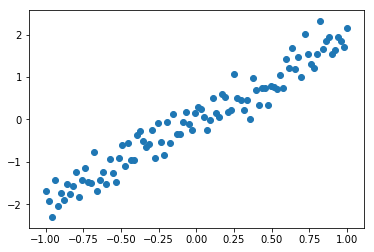

In [155]:
plt.scatter(x_train,y_train)

In [ ]:
## Defining a cost function, asks TF to run an optimizer to find 
#optimal solution for model parameters

In [156]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
#hyperparameters
learning_rate=0.01
training_epochs=100

In [158]:
x_train= np.linspace(-1,1,100)
y_train= 2*x_train+ np.random.randn(*x_train.shape)*0.33

In [159]:
# Set up input and output nodes as placeholders since values will be 
#injected by x_train and y_train
X= tf.placeholder("float")

In [160]:
Y= tf.placeholder("float")

In [161]:
# define model y=w*x
def model(X,w):
    return tf.multiply(X,w)

In [162]:
# set up weights
w= tf.Variable(0.0,name='weights')

In [163]:
# cost function
y_model= model(X,w)
cost= tf.square(Y-y_model)

In [165]:
#“Define the operation that will be called on each iteration of the learning algorithm”

#Excerpt From: Nishant Shukla. “Machine Learning with TensorFlow MEAP V09.” iBooks. 
train_op= tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [166]:
sess= tf.Session()
init= tf.global_variables_initializer()
sess.run(init)

In [169]:
for epoch in range(training_epochs):
    for (x,y) in zip(x_train,y_train):
        sess.run(train_op,feed_dict={X:x,Y:y})
w_val= sess.run(w)
    

In [170]:
sess.close()

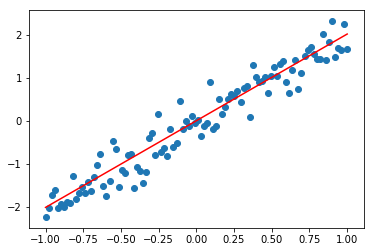

In [174]:
plt.scatter(x_train,y_train)
y_learned= x_train*w_val
plt.plot(x_train,y_learned,'r')

# Second Example- Simple Linear Regression

“Import TensorFlow for the learning algorithm. We'll need NumPy to set up the initial data. And we'll use matplotlib to visualize our data.
❷   Define some constants used by the learning algorithm. There are called hyper-parameters.
❸   Set up fake data that we will use to find a best fit line
❹   Set up the input and output nodes as placeholders since the value will be injected by x_train and y_train.”
“❺   Define the model as y = w*x
❻   Set up the weights variable
❼   Define the cost function
❽   Define the operation that will be called on each iteration of the learning algorithm
❾   Set up a session and initialize all variables
❿   Loop through the dataset multiple times
⓫   Loop through each item in the dataset
⓬   Update the model parameter(s) to try to minimize the cost function
⓭   Obtain the final parameter value
⓮   Close the session
⓯   Plot the original data
⓰   Plot the best fit line”



In [176]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
x_train= np.linspace(-1,1,100)
y_train= 2*x_train+ np.random.randn(*x_train.shape)*0.33

In [178]:
W= tf.Variable(tf.random_normal([1]),name='weights')

In [181]:
b= tf.Variable(tf.random_normal([1]),name='bias')

In [182]:
X= tf.placeholder(tf.float32, name ='InputX')

In [183]:
Y= tf.placeholder(tf.float32, name ='InputY')

In [184]:
y_pred= tf.add(tf.multiply(X,w),b)

In [217]:
#loss
loss=(tf.square(y_pred-Y))

In [218]:
# optimizer

optimizer=tf.train.GradientDescentOptimizer(0.01)

In [219]:
train= optimizer.minimize(loss)

In [220]:
sess= tf.Session()
init= tf.global_variables_initializer()
sess.run(init)

In [221]:
epochs=1000
    

In [222]:
for epoch in range(epochs):
    for (x,y) in zip(x_train,y_train):
        sess.run(train,feed_dict={X:x_train,Y:y_train})
w_val= sess.run(W)
b_val= sess.run(b)
    

In [223]:
w_val

array([ 2.66227841], dtype=float32)

In [224]:
b_val

array([-0.40113184], dtype=float32)

In [225]:
sess.close()

In [226]:
y_learned= x_train*w_val +b_val

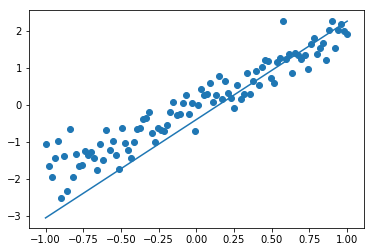

In [227]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_learned)

# Third Example- Simple Polynomial Regression

“❶   Import the relevant libraries and initialize the hyper-parameters
❷   Set up some fake raw input data
❸   Set up raw output data based on a degree 5 polynomial
❹   Add some noise
❺   Show a scatter plot of the raw data
❻   Define the nodes to hold values for input/output pairs
❼   Define our polynomial model
❽   Set up the parameter vector to all zeros
❾   Define the cost function just as before
❿   Set up the session and run the learning algorithm just as before
⓫   Close the session when done


In [228]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [229]:
x_train= np.linspace(-1,1,100)
#y_train= 2*x_train+ np.random.randn(*x_train.shape)*0.33

In [230]:
num_coeff=6
y_coeff=[1,2,3,4,5,6]

In [231]:
y_train=0

for i in range(num_coeff):
    y_train= y_coeff[i]*np.power(x_train,i)
y_train= y_train+np.random.randn(*x_train.shape)*1.5
    

In [233]:
y_train.shape

(100,)

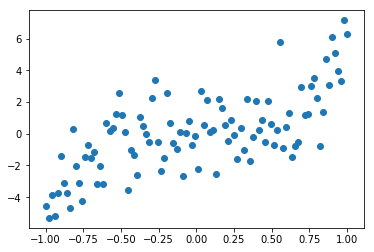

In [234]:
plt.scatter(x_train,y_train)

In [235]:
X= tf.placeholder(tf.float32, name ='InputX')
Y= tf.placeholder(tf.float32, name ='InputY')

In [253]:
w = tf.Variable([0.] * num_coeff, name="parameters")

#Excerpt From: Nishant Shukla. “Machine Learning with TensorFlow MEAP V09.” iBooks. 

In [254]:
#y_pred= tf.add(tf.multiply(X,w),b)
y_pred=[]
for i in range(num_coeff):
    y_preds= tf.multiply(w[i],tf.pow(X,i))
    y_pred.append(y_preds)
tf.add_n(y_pred)
    

<tf.Tensor 'AddN:0' shape=<unknown> dtype=float32>

In [255]:
y_pred

[<tf.Tensor 'Mul_19:0' shape=<unknown> dtype=float32>,
 <tf.Tensor 'Mul_20:0' shape=<unknown> dtype=float32>,
 <tf.Tensor 'Mul_21:0' shape=<unknown> dtype=float32>,
 <tf.Tensor 'Mul_22:0' shape=<unknown> dtype=float32>,
 <tf.Tensor 'Mul_23:0' shape=<unknown> dtype=float32>,
 <tf.Tensor 'Mul_24:0' shape=<unknown> dtype=float32>]

In [256]:
#loss
loss=(tf.square(y_pred-Y))

In [257]:
# optimizer

optimizer=tf.train.GradientDescentOptimizer(0.01)

In [258]:
train= optimizer.minimize(loss)

In [259]:
sess= tf.Session()
init= tf.global_variables_initializer()
sess.run(init)

In [260]:
epochs=1000

In [265]:
for epoch in range(epochs):
    for (x,y) in zip(x_train,y_train):
        sess.run(train,feed_dict={X:x_train,Y:y_train})
w_val= sess.run(w)

    

In [266]:
w_val

array([  8.94069672e-08,   2.94979954e+00,   1.90272033e-01,
         5.01474476e+00,   3.30376893e-01,   6.17513037e+00], dtype=float32)

In [267]:
#y_learned= x_train*w_val +b_val

y_learned=0
for i in range(num_coeff):
    y_learned+=w_val[i]*np.power(x_train,i)

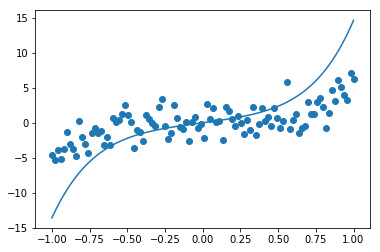

In [268]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_learned)

# Fourth Example- Simple Polynomial Regression using Regularization

In [ ]:
# add a parameter lambda|w| to loss and calcualte cost

### Evaluating regularization parameters



In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# Define hyperparameters
learning_rate= 0.001
training_epochs=1000
reg_lambda=0.


In [27]:
x_dataset= np.linspace(-1,1,100)

In [28]:
x_dataset

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

In [29]:
num_coeff=6
y_coeff=[1,2,3,4,5,6]

In [30]:
y_dataset=0

for i in range(num_coeff):
    y_dataset= y_coeff[i]*np.power(x_dataset,i)
y_dataset= y_dataset+np.random.randn(*x_dataset.shape)*1.5

In [31]:
y_dataset

array([ -4.87083287e+00,  -4.55278033e+00,  -3.67502049e+00,
        -4.09282920e+00,  -5.55956669e+00,  -3.14398395e+00,
        -2.01086656e+00,  -1.82900686e+00,  -3.33551354e+00,
        -2.26544206e+00,   6.85301112e-01,  -2.93609458e-01,
        -1.21908255e+00,  -1.41546516e+00,  -1.27086369e+00,
        -3.94676059e+00,  -2.37961220e+00,  -1.28174023e+00,
         5.35991469e-01,   1.68196352e-02,  -2.37257977e+00,
         3.62891437e-01,  -1.69320081e+00,  -2.73354175e+00,
        -3.62084744e+00,  -1.00502934e+00,   2.46197289e+00,
        -2.47377285e+00,   2.34725620e+00,   1.33603443e+00,
         1.22423282e+00,  -4.01768894e-01,  -5.04946261e-03,
        -5.10872657e-01,  -1.42309825e+00,  -1.16675538e+00,
        -2.06779243e-01,   2.65082284e+00,   1.41931423e-01,
        -5.28799585e-01,   1.20800130e+00,  -8.09100743e-01,
        -9.64051863e-01,   4.15547708e-01,   1.20623475e+00,
         2.54319560e+00,   2.13203299e+00,  -7.69312989e-02,
         1.57921553e+00,

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.33, random_state=42)

In [34]:
X= tf.placeholder("float")
Y= tf.placeholder("float")

In [35]:
w = tf.Variable([0.] * num_coeff, name="parameters")

In [36]:
#y_pred= tf.add(tf.multiply(X,w),b)
y_pred=[]
for i in range(num_coeff):
    y_preds= tf.multiply(w[i],tf.pow(X,i))
    y_pred.append(y_preds)
tf.add_n(y_pred)
    

<tf.Tensor 'AddN:0' shape=<unknown> dtype=float32>

In [41]:
#Regularization cost
cost = tf.div(tf.add(tf.reduce_sum(tf.square(Y-y_pred)),
tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))),2*X_train.size)

 

In [42]:
# optimizer

train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [43]:
sess= tf.Session()
init= tf.global_variables_initializer()
sess.run(init)

In [48]:
for reg_lambda in np.linspace(0,1,100):
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X: X_train, Y: y_train})
    final_cost = sess.run(cost, feed_dict={X: X_test, Y:y_test})
    print('reg lambda', reg_lambda)
    print('final cost', final_cost)
sess.close()
    
    
    
        
    

reg lambda 0.0
final cost 6.47586
reg lambda 0.010101010101
final cost 6.17902
reg lambda 0.020202020202
final cost 6.00582
reg lambda 0.030303030303
final cost 5.90266
reg lambda 0.040404040404
final cost 5.84047
reg lambda 0.0505050505051
final cost 5.80297
reg lambda 0.0606060606061
final cost 5.78081
reg lambda 0.0707070707071
final cost 5.7684
reg lambda 0.0808080808081
final cost 5.76234
reg lambda 0.0909090909091
final cost 5.76041
reg lambda 0.10101010101
final cost 5.7612
reg lambda 0.111111111111
final cost 5.76372
reg lambda 0.121212121212
final cost 5.76732
reg lambda 0.131313131313
final cost 5.77153
reg lambda 0.141414141414
final cost 5.77604
reg lambda 0.151515151515
final cost 5.78063
reg lambda 0.161616161616
final cost 5.78515
reg lambda 0.171717171717
final cost 5.78949
reg lambda 0.181818181818
final cost 5.79361
reg lambda 0.191919191919
final cost 5.79745
reg lambda 0.20202020202
final cost 5.80102
reg lambda 0.212121212121
final cost 5.80429
reg lambda 0.2222222

In [58]:
# Dataset LR with tensorflow

In [61]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [63]:
df=pd.read_csv("got.csv")

In [64]:
df

,S.No,actual,pred,alive,plod,name,title,male,culture,house,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,Lord of the seven kingdoms,1,Valyrian,NaN,...,0.0,0.0,NaN,0,0,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,House Frey,...,NaN,NaN,1.0,1,1,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Lord Commander,1,Valyrian,House Swyft,...,0.0,NaN,1.0,0,1,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen Consort,0,Andal,House Arryn,...,0.0,0.0,0.0,1,1,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,House Santagar,...,NaN,NaN,1.0,1,1,0,0,0,0.043478,1
5,6,1,0,0.021,0.979,Tommen Baratheon,King,1,Andal,House Lannister,...,1.0,1.0,NaN,0,0,5,1,1,1.000000,1
6,7,0,0,0.014,0.986,Valarr Targaryen,Hand of the King,1,Valyrian,House Targaryen,...,NaN,NaN,1.0,1,1,0,0,1,0.431438,0
7,8,0,0,0.036,0.964,Viserys I Targaryen,King of the Andals,1,Valyrian,House Targaryen,...,1.0,1.0,NaN,0,0,5,1,1,0.678930,0
8,9,0,1,0.724,0.276,Wilbert,Ser,1,Andal,NaN,...,NaN,NaN,NaN,0,1,0,0,0,0.006689,0
9,10,1,0,0.391,0.609,Wilbert Osgrey,Ser,1,Andal,House Tyrell,...,NaN,NaN,NaN,0,1,0,0,0,0.020067,1



## Correlating Popularity and Probability of Death with Tensorflow in GOT Dataset

In [84]:
# Define hyperparameters
learning_rate= 0.001
training_epochs=10
reg_lambda=0.

In [68]:
# Training Data 

train_X = df.as_matrix(columns=df.columns[4:5])

In [69]:
train_X

array([[ 0.946],
       [ 0.613],
       [ 0.507],
       ..., 
       [ 0.48 ],
       [ 0.363],
       [ 0.907]])

In [70]:
train_Y = df.as_matrix(columns=df.columns[24:25])

In [71]:
train_Y

array([[1],
       [1],
       [0],
       ..., 
       [0],
       [0],
       [0]])

In [72]:

#tf Graph Input

X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

In [74]:
#Set model weights
#randn give a distribution from standarized normal distribution
#mormal takes more parameters for more control 

W = tf.Variable(np.random.normal(), name="weight")
b = tf.Variable(np.random.normal(), name="bias")

In [77]:

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [105]:
#Mean squared error and Gradient descent optimizer 
cost = tf.reduce_sum(tf.pow(pred-Y, 2))
#Minimize minimizes W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [106]:
sess= tf.Session()
init= tf.global_variables_initializer()
sess.run(init)

In [107]:
for epoch in range(training_epochs):
    for (x,y) in zip(train_X,train_Y):
        sess.run(optimizer,feed_dict={X:x,Y:y})
w_val= sess.run(W)
b_val= sess.run(b)
    

In [108]:
training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})

In [109]:
training_cost

103.32274

In [110]:
w_val

0.2361497

In [111]:
b_val

0.015692377

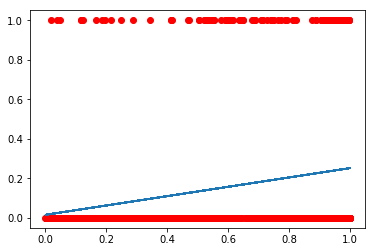

In [112]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')